# (How COVID19 Affected the flight of the USA
## by Abdulmalik Alaql

## Investigation Overview

We will see how COVID-19 affected the flight of the USA.
<li> How the number of flights changed before and after COVID-19 ? </li>
<li> How the flights delay changed before and after COVID-19 ? </li>
<li> Cancelled Flight</li>
<li> Reason for Cancellation </li>

## Dataset Overview

The dataset is about daily flights on USA on April-2019 and April-2020 months only. The dataset comes from https://www.transtats.bts.gov

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
data_df = pd.read_csv('Flights_Reporting_Cleaned.csv')
data_df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,day
0,2019,4,5,5,2019-04-05,LGA,FLL,11.0,4.0,0,NaN,0,146.0,1076,NaN,NaN,NaN,NaN,NaN,Friday
1,2019,4,6,6,2019-04-06,LGA,FLL,-11.0,-26.0,0,NaN,0,141.0,1076,NaN,NaN,NaN,NaN,NaN,Saturday
2,2019,4,7,7,2019-04-07,LGA,FLL,-8.0,-14.0,0,NaN,0,148.0,1076,NaN,NaN,NaN,NaN,NaN,Sunday
3,2019,4,8,1,2019-04-08,LGA,FLL,10.0,47.0,0,NaN,0,164.0,1076,0.0,0.0,47.0,0.0,0.0,Monday
4,2019,4,9,2,2019-04-09,LGA,FLL,66.0,85.0,0,NaN,0,159.0,1076,0.0,0.0,85.0,0.0,0.0,Tuesday


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## How the number of flights changed before and after COVID-19 ?

<li> We can see that 2019 has more fligh than 2020,  Number of flights on 2019 is '606507' and number of flights on 2020 is '254516. </li>
<li> In 2019 Monday and Tuesday was has the highest number of flights. In 2020 Wednesday and Thursday are the days with highest number of flights. maybe everyone wants to avoid crowding :)</li>


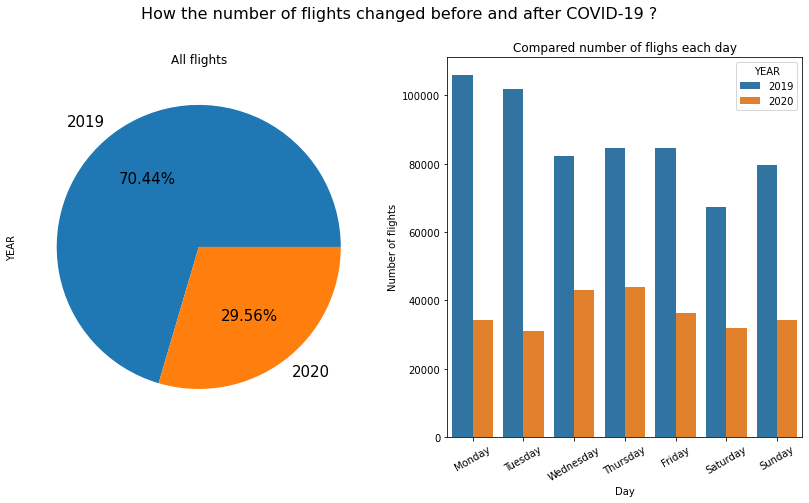

In [4]:
plt.figure(figsize = [14, 7])
plt.subplot(1, 2, 1)
data_df.YEAR.value_counts().plot(kind='pie',fontsize =15, autopct='%1.2f%%');
plt.title('All flights');
plt.subplot(1, 2, 2)


sb.countplot(data=data_df , x='day' ,hue='YEAR', order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);
plt.xlabel('Day');
plt.ylabel('Number of flights');
plt.xticks(rotation = 30);
plt.title('Compared number of flighs each day');
plt.suptitle('How the number of flights changed before and after COVID-19 ?',fontsize=16);



## How the flights delay changed before and after COVID-19 ?

We can see the performance in 2020 much better than 2019. in 2020 most of the flights has negative values for departure delay and arrival delay (negative numbers mean early departures and early arrivals

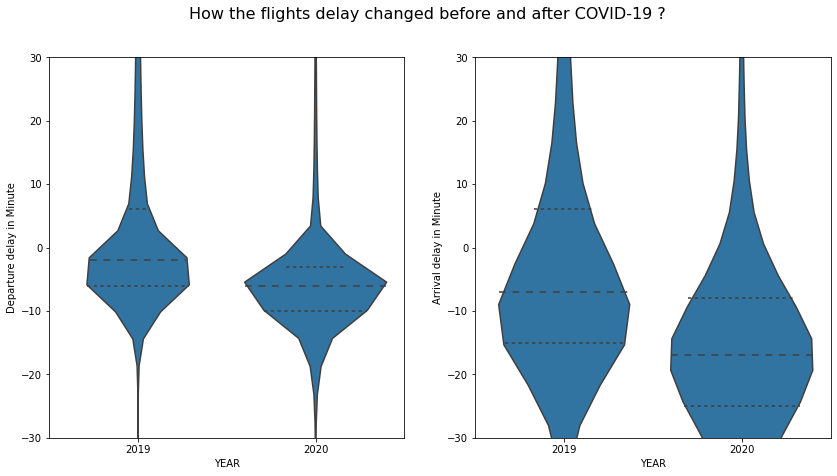

In [5]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [14, 7])
plt.subplot(1, 2, 1)
sb.violinplot(data=data_df, x='YEAR', y='DEP_DELAY',  color=base_color, inner='quartile');
plt.ylim((-30,30));
plt.xlabel('YEAR');
plt.ylabel('Departure delay in Minute');
plt.subplot(1, 2, 2)
sb.violinplot(data=data_df, x='YEAR', y='ARR_DELAY',  color=base_color, inner='quartile');
plt.ylim((-30,30));
plt.xlabel('YEAR');
plt.ylabel('Arrival delay in Minute');
plt.suptitle('How the flights delay changed before and after COVID-19 ?',fontsize=16);

## Cancelled Flight

Number of Cancelled flights on 2020 is more than on 2019, even though number of flight on 2019 is 70.44% more than 2020 !

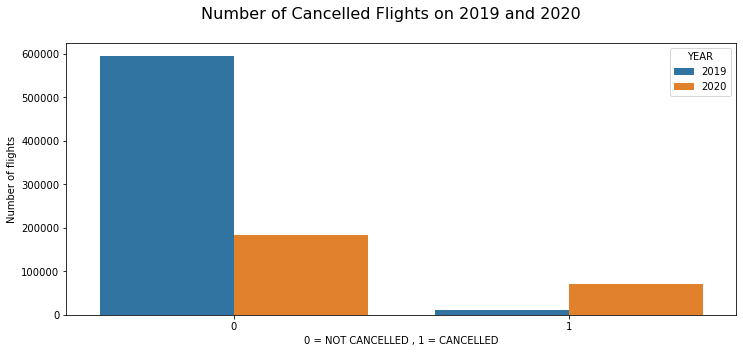

In [6]:
plt.figure(figsize = [12, 5])
sb.countplot(data=data_df , x='CANCELLED' ,hue='YEAR' );
plt.xlabel('0 = NOT CANCELLED , 1 = CANCELLED');
plt.ylabel('Number of flights');
plt.suptitle('Number of Cancelled Flights on 2019 and 2020',fontsize=16);

## Reason for Cancellation
We can see the reason for cancellation of the flights is very diffrent. non of 2019 flights was cancelled for security reason while in 2020 almost every flights was cancelled for security reason.

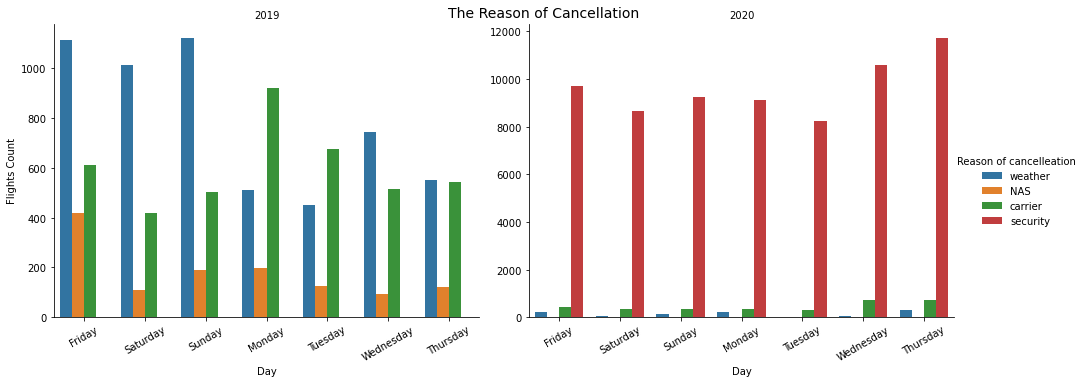

In [10]:
My_figure=sb.catplot(data=data_df, x='day', col="YEAR", hue='CANCELLATION_CODE', kind='count', aspect=20/15,
                 sharey=False);
My_figure.set_xticklabels(rotation=30);
My_figure.set_axis_labels('Day', 'Flights Count');
My_figure._legend.set_title('Reason of cancelleation');
My_figure.set_titles('{col_name}');
plt.suptitle('The Reason of Cancellation',fontsize=14);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!